In [11]:
# notebooks/sentiment_analysis.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src import load_news_data, get_sentiment, plot_distribution, plot_bar

In [ ]:
news_df = load_news_data('data/raw_analyst_ratings.csv')

# Compute sentiment scores
news_df['sentiment'] = news_df['headline'].apply(get_sentiment)

Columns in the dataset: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']

First few rows:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock 

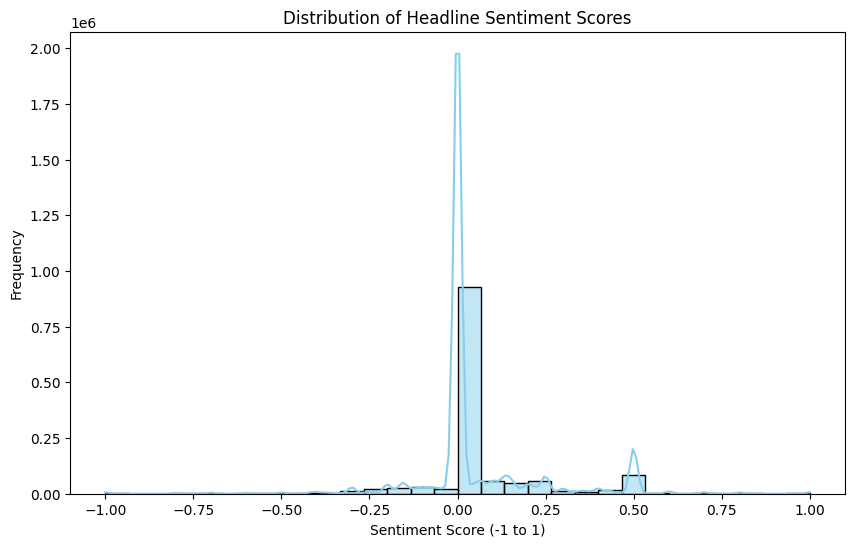

In [3]:
# Sentiment distribution
plot_distribution(
    news_df['sentiment'],
    title='Distribution of Headline Sentiment Scores',
    xlabel='Sentiment Score (-1 to 1)',
    ylabel='Frequency',
    filename='../plots/sentiment_distribution.png'
)

In [10]:
# Sentiment by stock
stock_sentiment = news_df.groupby('stock')['sentiment'].mean().sort_values()
print("Top/Bottom 5 Stocks by Average Sentiment:\n", stock_sentiment.head(5), "\n", stock_sentiment.tail(5))

# Plot top/bottom sentiment stocks
plt.figure(figsize=(10, 6))
stock_sentiment.head(5).concat(stock_sentiment.tail(5)).plot(kind='bar', color='orchid')
plt.title('Top/Bottom 5 Stocks by Average Sentiment')
plt.xlabel('Stock Symbol')
plt.ylabel('Average Sentiment Score')
plt.savefig('../plots/stock_sentiment.png')
plt.show()

Top/Bottom 5 Stocks by Average Sentiment:
 stock
RVM    -0.750000
ANCI   -0.369118
MCZ    -0.319141
CZNC   -0.233058
DSE    -0.232955
Name: sentiment, dtype: float64 
 stock
ARTNA    0.471060
VIXY     0.500000
BFAM     0.506444
PWRD     0.550106
GXP      0.619990
Name: sentiment, dtype: float64


AttributeError: 'Series' object has no attribute 'concat'

<Figure size 1000x600 with 0 Axes>